In [3]:
import pandas as pd
file_path = 'path_to_your_file/LG_Customer_Data_30.csv'
data = pd.read_csv("LG_Customer_Data_300.csv")

In [4]:
 # Get basic info about the dataset
data.info()

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           300 non-null    object 
 1   Age                   300 non-null    int64  
 2   Gender                300 non-null    object 
 3   Income                300 non-null    int64  
 4   Region                300 non-null    object 
 5   Purchase_Frequency    300 non-null    int64  
 6   Average_Spend         300 non-null    float64
 7   Preferred_Channel     300 non-null    object 
 8   Product_Category      300 non-null    object 
 9   Loyalty_Score         300 non-null    int64  
 10  Feedback_Score        300 non-null    int64  
 11  Promotional_Response  300 non-null    object 
 12  Marital_Status        300 non-null    object 
 13  Occupation            300 non-null    object 
 14  Education_Level       300 non-null    object 
 15  Product_Rating        3

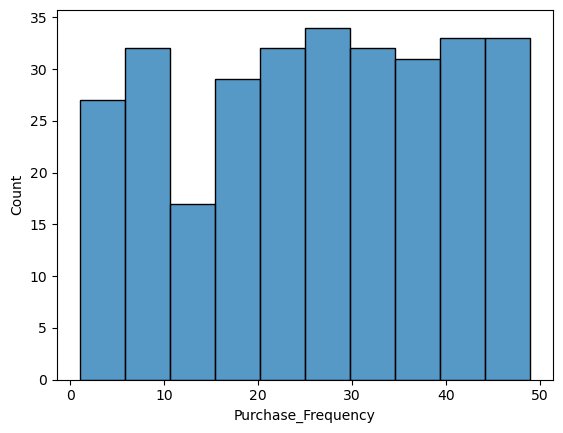

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Check distribution of a numerical column
sns.histplot(data['Purchase_Frequency'])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
X = data.drop('Region', axis=1)  # Replace 'target_column' with your column name
y = data['Income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
X = data.drop('Region', axis=1)  # Replace 'target_column' with your column name
y = data['Purchase_Frequency']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
X = data.drop('Gender', axis=1)  # Replace 'target_column' with your column name
y = data['Income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print(X_train.dtypes)
X_train = X_train.drop(['Customer_ID'], axis=1)  # Replace 'customer_id_column' with the actual column name
X_test = X_test.drop(['Customer_ID'], axis=1)

Customer_ID              object
Age                       int64
Income                    int64
Region                   object
Purchase_Frequency        int64
Average_Spend           float64
Preferred_Channel        object
Product_Category         object
Loyalty_Score             int64
Feedback_Score            int64
Promotional_Response     object
Marital_Status           object
Occupation               object
Education_Level          object
Product_Rating          float64
Annual_Savings            int64
Customer_Since            int64
dtype: object


In [10]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align train and test sets to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing columns with zeros

In [11]:
print(X_train.columns)

Index(['Age', 'Income', 'Purchase_Frequency', 'Average_Spend', 'Loyalty_Score',
       'Feedback_Score', 'Product_Rating', 'Annual_Savings', 'Customer_Since',
       'Region_Africa', 'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_South America', 'Preferred_Channel_Both',
       'Preferred_Channel_In-Store', 'Preferred_Channel_Online',
       'Product_Category_Appliances', 'Product_Category_Electronics',
       'Product_Category_Mobile Devices', 'Product_Category_Others',
       'Promotional_Response_High', 'Promotional_Response_Low',
       'Promotional_Response_Medium', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widowed', 'Occupation_Artist', 'Occupation_Designer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Scientist', 'Occupation_Teacher',
       'Education_Level_Bachelor's', 'Education_Level_High School',
       'Education_Lev

In [12]:
print(data.columns)

Index(['Customer_ID', 'Age', 'Gender', 'Income', 'Region',
       'Purchase_Frequency', 'Average_Spend', 'Preferred_Channel',
       'Product_Category', 'Loyalty_Score', 'Feedback_Score',
       'Promotional_Response', 'Marital_Status', 'Occupation',
       'Education_Level', 'Product_Rating', 'Annual_Savings',
       'Customer_Since'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Product_Category_Mobile'] = le.fit_transform(X_train['Product_Category_Appliances'])  # Replace 'category_column'
X_test['Product_Category_Others'] = le.transform(X_test['Product_Category_Electronics'])

In [14]:
print(X_train.dtypes)
print(X_train.head())

Age                                  int64
Income                               int64
Purchase_Frequency                   int64
Average_Spend                      float64
Loyalty_Score                        int64
Feedback_Score                       int64
Product_Rating                     float64
Annual_Savings                       int64
Customer_Since                       int64
Region_Africa                         bool
Region_Asia                           bool
Region_Europe                         bool
Region_North America                  bool
Region_South America                  bool
Preferred_Channel_Both                bool
Preferred_Channel_In-Store            bool
Preferred_Channel_Online              bool
Product_Category_Appliances           bool
Product_Category_Electronics          bool
Product_Category_Mobile Devices       bool
Product_Category_Others               bool
Promotional_Response_High             bool
Promotional_Response_Low              bool
Promotional

In [15]:
# Align the training and test sets to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill any missing columns in the test set with zeros
X_test = X_test.fillna(0)


In [16]:
print("Train columns:", X_train.columns)
print("Test columns:", X_test.columns)


Train columns: Index(['Age', 'Income', 'Purchase_Frequency', 'Average_Spend', 'Loyalty_Score',
       'Feedback_Score', 'Product_Rating', 'Annual_Savings', 'Customer_Since',
       'Region_Africa', 'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_South America', 'Preferred_Channel_Both',
       'Preferred_Channel_In-Store', 'Preferred_Channel_Online',
       'Product_Category_Appliances', 'Product_Category_Electronics',
       'Product_Category_Mobile Devices', 'Product_Category_Others',
       'Promotional_Response_High', 'Promotional_Response_Low',
       'Promotional_Response_Medium', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widowed', 'Occupation_Artist', 'Occupation_Designer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Scientist', 'Occupation_Teacher',
       'Education_Level_Bachelor's', 'Education_Level_High School',
      

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.0


In [18]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.0


In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
print(y_train.value_counts())

Income
28415     1
43625     1
59954     1
82856     1
43524     1
         ..
142402    1
124293    1
119518    1
144097    1
45289     1
Name: count, Length: 240, dtype: int64


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [22]:
from sklearn.model_selection import StratifiedKFold

# Set n_splits to 2 if the smallest class has at least 2 samples
stratified_kfold = StratifiedKFold(n_splits=2)


In [23]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)


X_train Shape: (240, 41)
y_train Shape: (240,)


In [24]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=3,        # 3-fold cross-validation
    n_jobs=-1,   # Use all processors
    verbose=2    # Print progress
)


In [26]:
try:
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
except Exception as e:
    print("Error during GridSearchCV fitting:", str(e))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Error during GridSearchCV fitting: n_splits=3 cannot be greater than the number of members in each class.


In [27]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=1)

In [28]:
import pandas as pd
print(pd.Series(y_train).value_counts())

Income
28415     1
43625     1
59954     1
82856     1
43524     1
         ..
142402    1
124293    1
119518    1
144097    1
45289     1
Name: count, Length: 240, dtype: int64


In [29]:
X_train_large, y_train_large = X_train[:500], y_train[:500]  # Example with 500 samples
grid_search.fit(X_train_large, y_train_large)


InvalidParameterError: The 'cv' parameter of GridSearchCV must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

In [30]:
X_train_small, y_train_small = X_train[:100], y_train[:100]  # Example subset of 100 samples
grid_search.fit(X_train_small, y_train_small)

InvalidParameterError: The 'cv' parameter of GridSearchCV must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.0
Confusion Matrix:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

       20384       0.00      0.00      0.00       1.0
       20728       0.00      0.00      0.00       0.0
       21015       0.00      0.00      0.00       0.0
       21324       0.00      0.00      0.00       1.0
       21542       0.00      0.00      0.00       0.0
       24158       0.00      0.00      0.00       1.0
       24748       0.00      0.00      0.00       1.0
       24809       0.00      0.00      0.00       0.0
       25486       0.00      0.00      0.00       1.0
       27239       0.00      0.00      0.00       0.0
       28702       0.00      0.00      0.00       1.0
       29337       0.00      0.00      0.00       1.0
       29435       0.00      0.00      0.00       1.0
       30916       0.00      0.00      0.00       1.0
       31130  

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\m

In [32]:
import numpy as np

# Now you can use np.unique
print(X_train_small.shape)
print(np.unique(y_train_small, return_counts=True))

(100, 41)
(array([ 21542,  23709,  24835,  26801,  27239,  28415,  30975,  33116,
        38017,  38384,  39087,  40159,  40384,  41677,  41949,  42700,
        43625,  43793,  43959,  45470,  46432,  46962,  47712,  48016,
        49703,  50355,  52307,  54578,  56395,  56939,  57744,  58765,
        59081,  61430,  61555,  62348,  62918,  64482,  65543,  66427,
        66732,  67605,  67926,  70343,  70612,  72528,  73330,  73932,
        75771,  76570,  77799,  78017,  78141,  79163,  80566,  81529,
        81629,  81642,  86040,  86203,  86703,  89172,  89896,  99459,
       100219, 102637, 102848, 103285, 106188, 108858, 109112, 110469,
       111792, 113396, 115084, 117007, 119518, 119657, 122023, 122795,
       123150, 124293, 125570, 126995, 127892, 130008, 133748, 134065,
       138874, 139180, 141507, 141790, 141954, 142402, 144097, 144704,
       145899, 147016, 148148, 149695], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 

In [33]:
# Import K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the KNN model
knn_model.fit(X_train, y_train)

# Step 3: Predict and evaluate the KNN model
y_pred_knn = knn_model.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.0
KNN Classification Report:
              precision    recall  f1-score   support

       20384       0.00      0.00      0.00       1.0
       20404       0.00      0.00      0.00       0.0
       20728       0.00      0.00      0.00       0.0
       21062       0.00      0.00      0.00       0.0
       21324       0.00      0.00      0.00       1.0
       21542       0.00      0.00      0.00       0.0
       23709       0.00      0.00      0.00       0.0
       24158       0.00      0.00      0.00       1.0
       24748       0.00      0.00      0.00       1.0
       24835       0.00      0.00      0.00       0.0
       25486       0.00      0.00      0.00       1.0
       25713       0.00      0.00      0.00       0.0
       28335       0.00      0.00      0.00       0.0
       28702       0.00      0.00      0.00       1.0
       29337       0.00      0.00      0.00       1.0
       29435       0.00      0.00      0.00       1.0
       30916       0.00      0.00   

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\m

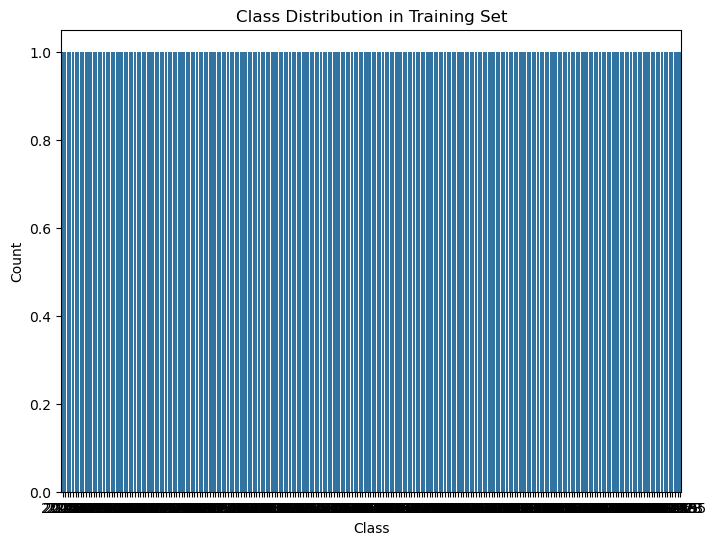

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable (y_train)
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

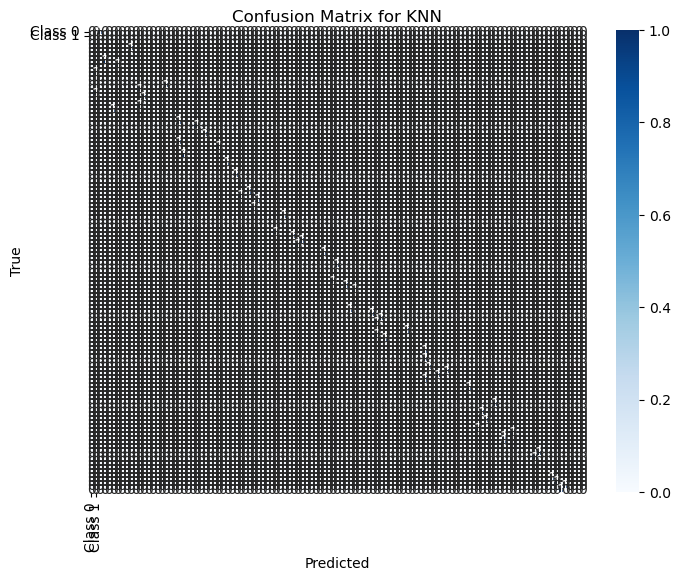

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for KNN or any other model
cm = confusion_matrix(y_test, y_pred_knn)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
model = LogisticRegression(max_iter=1000, warm_start=True)
model.fit(X_train_scaled, y_train)

NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train_scaled, y_train)


In [37]:
model = LogisticRegression(solver='liblinear', max_iter=1000)  # Or use 'saga'
model.fit(X_train_scaled, y_train)


NameError: name 'LogisticRegression' is not defined

In [38]:
# Assuming accuracy scores are stored for different models
models = ['KNN', 'Random Forest', 'Logistic Regression']
accuracy_scores = [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr)]

# Plotting the accuracy scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'y_pred_rf' is not defined

In [39]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pickle
import numpy as np
from flask import Flask, request, jsonify
from flask_cors import CORS

# Initialize Flask app
app = Flask(__name__)
CORS(app)  # Enable CORS for cross-origin requests

# Load the model and scaler
with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Define a route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Log the incoming request
        print("Received data:", request.json)

        # Get JSON data from the request
        data = request.get_json()

        # Extract and validate inputs
        income = float(data.get('Income', 0))  # Default to 0 if key is missing
        avg_spend = float(data.get('Average_Spend', 0))  # Default to 0 if key is missing

        # Log extracted data
        print(f"Income: {income}, Average Spend: {avg_spend}")

        # Preprocess input data
        input_features = np.array([[income, avg_spend]])
        input_scaled = scaler.transform(input_features)

        # Make prediction
        cluster = kmeans_model.predict(input_scaled)[0]

        # Return the prediction
        return jsonify({'cluster': int(cluster)})

    except Exception as e:
        # Log and return the error
        print(f"Error: {str(e)}")
        return jsonify({'error': str(e)}), 400

# Run the app for local testing
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [40]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [41]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assume X_train, y_train are preprocessed and ready
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'pricing_model.pkl')


['pricing_model.pkl']

In [42]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the saved model
model = joblib.load('pricing_model.pkl')

@app.route('/')
def home():
    return "Welcome to the Product Pricing Optimization API!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)

        # Generate predictions
        prediction = model.predict(features)

        return jsonify({
            'prediction': prediction.tolist()
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, Render!"

if __name__ == "__main__":
    app.run()


In [43]:
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

# Initialize Flask app
app = Flask(__name__)

# Load pre-trained model (ensure you save the model first as a .pkl file)
model = joblib.load("random_forest_model.pkl")  # Replace with the actual model file path

@app.route('/')
def home():
    return "Machine Learning Model API is Running!"

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from the POST request
    data = request.get_json()

    # Convert the data into a DataFrame or numpy array for prediction
    features = np.array(data['features']).reshape(1, -1)  # Ensure the data matches your model's input shape

    # Make prediction
    prediction = model.predict(features)

    # Return the prediction as JSON
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\USER\anaconda3\Lib\site-packages\sklearn\externals\__init__.py)

In [44]:
import joblib

# Assuming 'model' is your trained RandomForestClassifier
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [45]:
app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.3:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [50]:
import subprocess

# Define the curl command as a list
command = [
    "curl", "-v", "-X", "POST", 
    "https://yourfinalwork.onrender.com/endpoint",
    "-H", "Content-Type: application/json",
    "-d", '{"your_input_key": "your_input_value"}'
]

# Execute the command
result = subprocess.run(command, capture_output=True, text=True)

# Print the output or error
print("Output:", result.stdout)
print("Error:", result.stderr)

Output: Not Found

Error: Note: Unnecessary use of -X or --request, POST is already inferred.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0* Host yourfinalwork.onrender.com:443 was resolved.
* IPv6: (none)
* IPv4: 216.24.57.4, 216.24.57.252
*   Trying 216.24.57.4:443...
* Connected to yourfinalwork.onrender.com (216.24.57.4) port 443
* schannel: disabled automatic use of client certificate
* ALPN: curl offers http/1.1
* ALPN: server accepted http/1.1
* using HTTP/1.x
> POST /endpoint HTTP/1.1

> Host: yourfinalwork.onrender.com

> User-Agent: curl/8.9.1

> Accept: */*

> Content-Type: application/json

> Content-Length: 38

> 

} [38 bytes data]
* upload completely sent off: 38 bytes

100    38    0     0  100    38    

In [52]:
import requests

url = "https://yourfinalwork.onrender.com/endpoint"
headers = {"Content-Type": "application/json"}
data = {"your_input_key": "your_input_value"}

response = requests.post(url, headers=headers, json=data)

# Print the response
print("Status Code:", response.status_code)
print("Response:", response.text)


Status Code: 404
Response: Not Found

